Kevin Trafford

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [58]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns



In [59]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
mse = np.mean((y_test - y_pred) ** 2)

print(f'R^2: {r2}')
print(f'MSE: {mse}')
print(f'model coefficients: {model.coef_}, {model.intercept_}')

R^2: 0.9522679117391497
MSE: 1131.9860366541855
model coefficients: [44.166675   80.03255319 90.51428891 86.13498446 67.48800688], 32.68084820747811


#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?



MSE- 1131.986


R^2- 0.95226


Intercept: [-583398.24872835]


Coefficients: [[-38564.20516967    195.36489918 104154.10935464]]



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [14]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.007315,0.019679,-0.021250,-0.104704,0.024364,0.017516,-0.055686,-0.030241,0.034656,-0.068220,11.024821
1,-0.005907,-0.016114,-0.030258,-0.069527,-0.030260,-0.003122,-0.073716,-0.042138,-0.044862,-0.088413,26.768245
2,0.034912,0.022882,0.055374,0.004005,-0.003374,-0.010581,0.082788,0.037517,-0.003320,0.000055,74.843172
3,-0.037772,0.014265,-0.064396,0.018594,-0.033567,0.000601,0.010608,0.035124,-0.002234,-0.010405,17.916094
4,0.040552,-0.035211,-0.023375,-0.024265,-0.039836,-0.001579,-0.038636,0.022221,-0.043877,0.050826,42.288164
...,...,...,...,...,...,...,...,...,...,...,...
295,-0.003048,-0.012778,-0.027216,0.031704,-0.084934,-0.041188,-0.021073,-0.044629,-0.076264,-0.021814,-3.417642
296,0.007356,0.010974,-0.001972,-0.041844,0.014359,0.005986,-0.020905,0.029846,0.003773,-0.010404,-0.392983
297,0.084358,-0.042124,0.025305,0.004588,0.056307,-0.004906,-0.028724,-0.025042,0.054304,0.035701,69.303731
298,-0.018910,0.020567,-0.005862,0.009466,-0.020524,0.036581,0.040956,0.031080,-0.016986,0.046116,30.670278


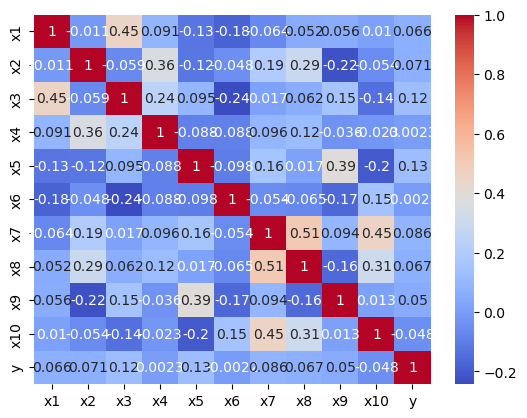

R^2: -0.03738706142611803
MSE: 1006.9283175171113
model coefficients: [100.54351296  68.09467682  39.08138322 -53.14977214  76.59451309
  62.1462408  111.41635577   2.41736139   0.64834276 -74.00176706], 32.67545906701269


In [52]:

corr_matrix = reg2_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

X2 = reg2_df.drop(columns=['y'])
y2 = reg2_df['y']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

r2_2 = model2.score(X2_test, y2_test)
mse_2 = np.mean((y2_test - y2_pred) ** 2)

print(f'R^2: {r2_2}')
print(f'MSE: {mse_2}')

print(f'model coefficients: {model2.coef_}, {model2.intercept_}')

#### Your written answers here

Which features (x1, x2...) were significant? Which were co-linear?


Significant- x1/x3, x2/x4, x5/x10


Collinearity- x7/x8


R^2: -0.03738706142611803

MSE: 1006.9283175171113
 
 

Intercept: 32.67545906701269


Coefficients: [100.54351296  68.09467682  39.08138322 -53.14977214  76.59451309
  62.1462408  111.41635577   2.41736139   0.64834276 -74.00176706]


## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [16]:
housing_df = pd.read_csv('kc_house_data.csv')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


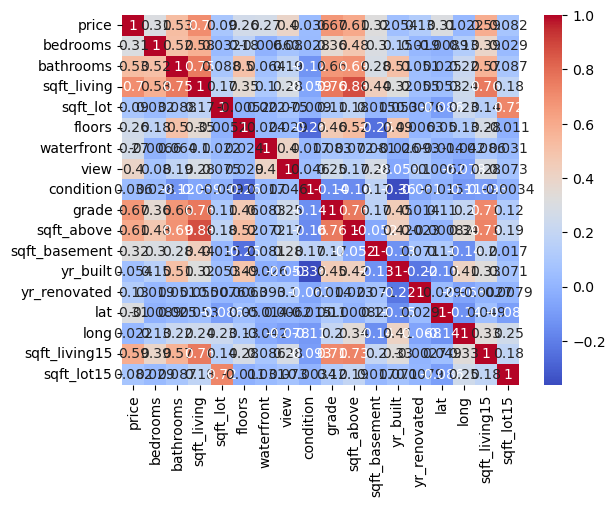

In [ ]:
corr = housing_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



R^2: 0.5371160102559775


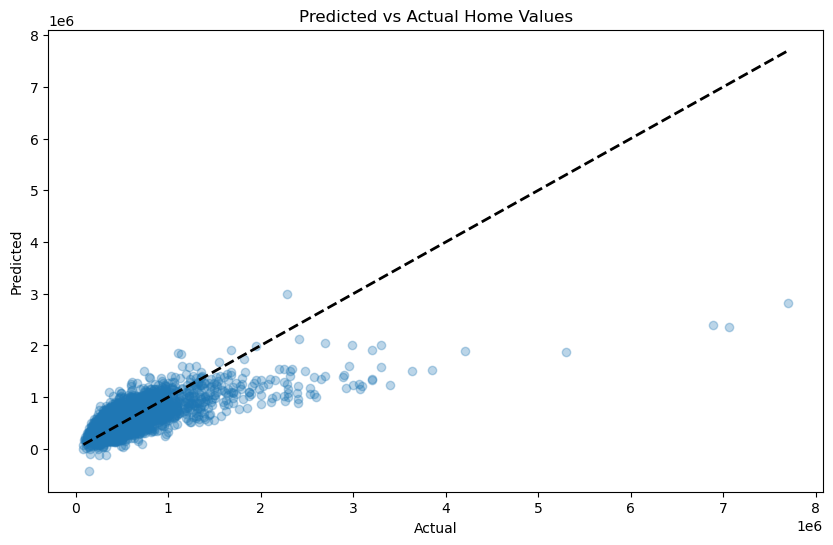

In [47]:

from sklearn.preprocessing import StandardScaler

X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

r2 = model_linreg.score(X_scaled_test, y_test)
print(f'R^2: {r2}')

y_pred = model_linreg.predict(X_scaled_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Home Values')
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - We are using the features of square feet, bathrooms, and grade, as these appear to be the most closely correlated to price.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

R^2: 0.6319965065878769
Top 3 features: Index(['sqft_living', 'lat', 'grade'], dtype='object')


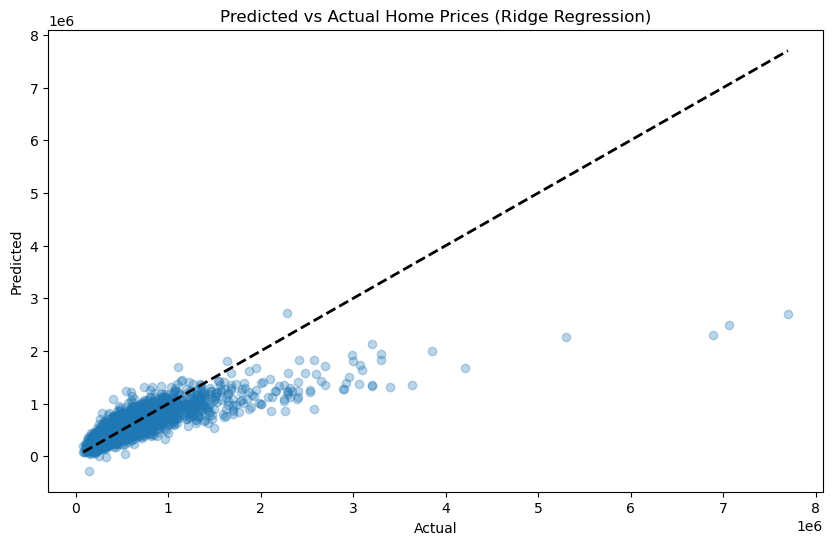

In [48]:
from sklearn.linear_model import Ridge

features = housing_df.drop(columns=['price'])
target = housing_df['price']

feature_names = features.columns

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=10000)
ridge_model.fit(X_train_scaled, y_train)

r2_ridge = ridge_model.score(X_test_scaled, y_test)
print(f'R^2: {r2_ridge}')

coefficients = ridge_model.coef_
sorted_indices = np.argsort(np.abs(coefficients))[-3:]
top_features = feature_names[sorted_indices]
print(f'Top 3 features: {top_features}')

y_pred_ridge = ridge_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Home Prices (Ridge Regression)')
plt.show()

### Your written answers here
Which regression did you use?
 - Ridge

Does your regularized model look better than your MLR? How so?
 - The regularized model does look somewhat better however it is by a slim margin. There appears to be slightly less ooutliers and a more uniform distribution. 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

R^2 for below $1M: 0.6366413475222603
R^2 for above $1M: 0.5468680539152903


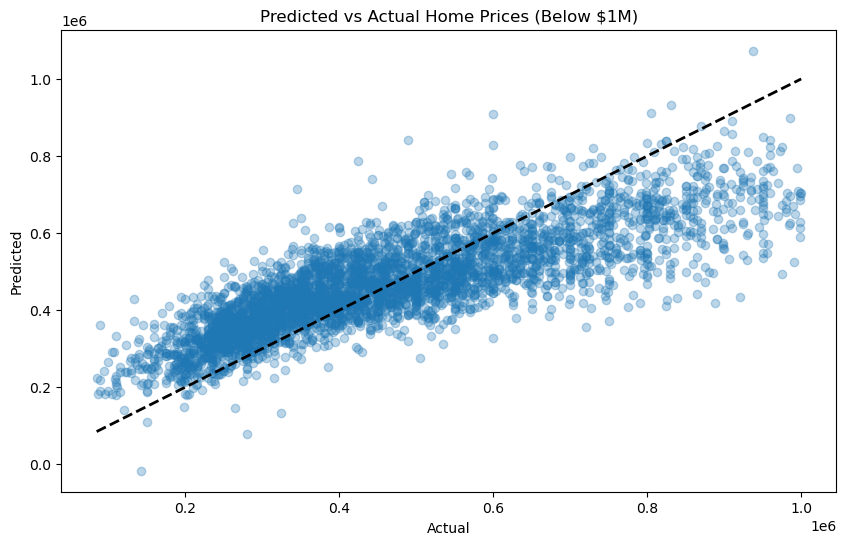

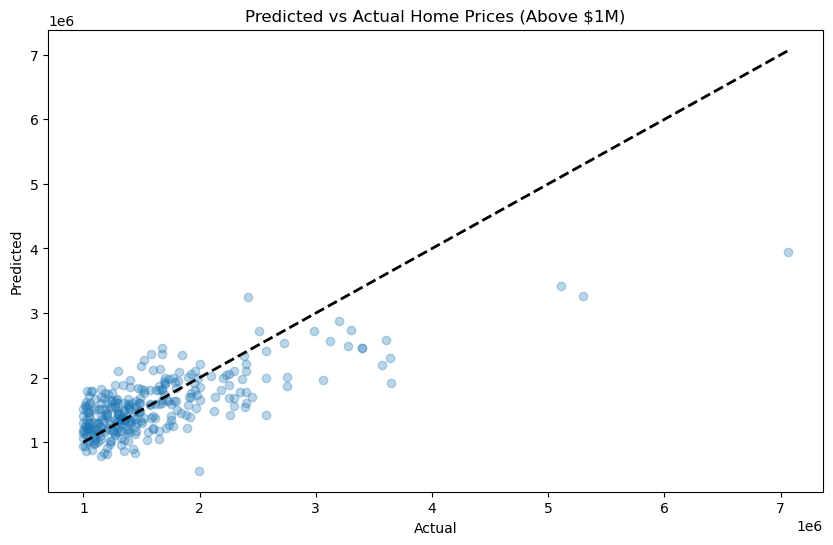

In [57]:
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

X_below = below_1M.drop(columns=['price'])
y_below = below_1M['price']

X_above = above_1M.drop(columns=['price'])
y_above = above_1M['price']

X_below_train, X_below_test, y_below_train, y_below_test = train_test_split(X_below, y_below, test_size=0.2, random_state=1)
X_above_train, X_above_test, y_above_train, y_above_test = train_test_split(X_above, y_above, test_size=0.2, random_state=1)

scaler_below = StandardScaler()
X_below_train_scaled = scaler_below.fit_transform(X_below_train)
X_below_test_scaled = scaler_below.transform(X_below_test)

scaler_above = StandardScaler()
X_above_train_scaled = scaler_above.fit_transform(X_above_train)
X_above_test_scaled = scaler_above.transform(X_above_test)

ridge_model_below = Ridge(alpha=10000)
ridge_model_below.fit(X_below_train_scaled, y_below_train)

ridge_model_above = Ridge(alpha=100)
ridge_model_above.fit(X_above_train_scaled, y_above_train)

r2_below = ridge_model_below.score(X_below_test_scaled, y_below_test)
print(f'R^2 for below $1M: {r2_below}')

r2_above = ridge_model_above.score(X_above_test_scaled, y_above_test)
print(f'R^2 for above $1M: {r2_above}')

y_below_pred = ridge_model_below.predict(X_below_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_below_test, y_below_pred, alpha=0.3)
plt.plot([y_below_test.min(), y_below_test.max()], [y_below_test.min(), y_below_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Home Prices (Below $1M)')
plt.show()

y_above_pred = ridge_model_above.predict(X_above_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_above_test, y_above_pred, alpha=0.3)
plt.plot([y_above_test.min(), y_above_test.max()], [y_above_test.min(), y_above_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Home Prices (Above $1M)')
plt.show()

<Your written answers>

 ### Your written answers here

 What are the $R^2$ for the two models?



R^2 for below $1M: 0.6366413475222603


R^2 for above $1M: 0.5468680539152903

